In [1]:
using Plots

In [2]:
pyplot()

Plots.PyPlotBackend()

In [3]:
Plots.scalefontsizes(1.5)

In [4]:
using LaTeXStrings

In [5]:
include("cavitymethod.jl")

rho_bouchaud_population (generic function with 1 method)

In [6]:
function omegabar(lambda,c, ep)
    l = lambda -ep*im
    1/4*(im*(-2+c+2*c*l)+sqrt(-4+4*c-c^2-4*c^2*l - 4*c^2*l^2))
end

omegabar (generic function with 1 method)

In [24]:
function rho_barrat_tinfty(lambda, c, T, ensemble, epsilon2)
    beta = 1./T
    res = zeros(ensemble);
    dist_energy = Exponential()
    
    obar = omegabar(lambda, c, epsilon2)
    energies = rand(dist_energy,c)
    e1 = rand(dist_energy)
    Kij = K_sym(e1, beta, energies)
    omega_cm1 =  im*(lambda-epsilon2*im)*exp(beta*e1)*c + sum(im*(Kij.*obar)./(im*(Kij) .+ obar))
    res[1] = real(exp(beta*e1)*c/omega_cm1)
    for j in 2:ensemble
        energies = rand(dist_energy,c)
        e1 = rand(dist_energy)
        Kij = K_sym(e1, beta, energies)
        omega_cm1 =  im*(lambda-epsilon2*im)*exp(beta*e1)*c + sum(im*(Kij.*obar)./(im*(Kij) .+ obar))
        res[j] = real(exp(beta*e1)*c/omega_cm1)
    end
    mean(res)*1/pi
end


rho_barrat_tinfty (generic function with 2 methods)

In [8]:
function rho_barrat_2nd(lambda, c, T, Np, ensemble, nsteps, epsilon2)
    beta = 1./T
    poparray = init_array(Np)
    res = zeros(ensemble);
    dist_energy = Exponential()
    obar = omegabar(lambda, c, epsilon2)
    os = zeros(Complex{Float64}, c)
    e1_shell = zeros(c)
    for i in 1:c
        energies = rand(dist_energy, c-1)
        e1 = rand(dist_energy)
        e1_shell[i] = e1
        Kij = K_sym(e1, beta, energies)
        os[i] =  im*(lambda-epsilon2*im)*exp(beta*e1)*c + sum(im*(Kij.*obar)./(im*(Kij) .+ obar))
    end
     #energies = rand(dist_energy, c)
     e1 = rand(dist_energy)
     Kij = K_sym(e1, beta, e1_shell)
    omega_cm1 =  im*(lambda-epsilon2*im)*exp(beta*e1)*c + sum(im*(Kij.*os)./(im*(Kij) .+ os))
    
    res[1] = real(exp(beta*e1)*c/omega_cm1)
    for j in 2:ensemble
        for i in 1:c
            energies = rand(dist_energy, c-1)
            e1 = rand(dist_energy)
            e1_shell[i] = e1
            Kij = K_sym(e1, beta, energies)
            os[i] =  im*(lambda-epsilon2*im)*exp(beta*e1)*c + sum(im*(Kij.*obar)./(im*(Kij) .+ obar))
        end
         #energies = rand(dist_energy, c)
         e1 = rand(dist_energy)
         Kij = K_sym(e1, beta, e1_shell)
        omega_cm1 =  im*(lambda-epsilon2*im)*exp(beta*e1)*c + sum(im*(Kij.*os)./(im*(Kij) .+ os))
        
        res[j] = real(exp(beta*e1)*c/omega_cm1)
    end
    mean(res)*1/pi
end

rho_barrat_2nd (generic function with 1 method)

In [59]:
Np = 2500
nsteps = 25000
epsilon = 1.e-300
epsilon2 = 1.e-5
ensemble = Int64(10^5);
c = 5;
T = 0.1;

In [33]:
#lambda_barrat = -linspace(0.,1.,101);
lambda_barrat = -logspace(-4.,0.,101);

In [34]:
rho_infty = [rho_barrat_tinfty(lambda, c, T,  ensemble, epsilon2) for lambda in lambda_barrat];

In [60]:
rho_2nd = [rho_barrat_2nd(lambda, c, T, Np, ensemble, nsteps, epsilon2) for lambda in lambda_barrat];

In [36]:
rho_ba = [rho_barrat_population(i, c, T, Np, ensemble, nsteps, epsilon, epsilon2) for i in lambda_barrat];

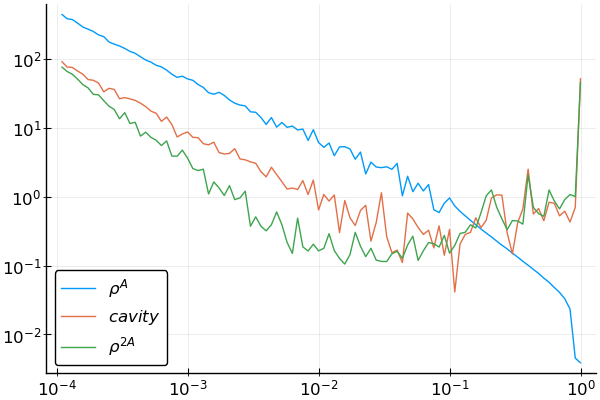

In [61]:
plot(-lambda_barrat[2:end], rho_infty[2:end], label = L"\rho^A", xscale = :log10, yscale = :log10)
plot!(-lambda_barrat[2:end], rho_ba[2:end], label = L"cavity")
plot!(-lambda_barrat[2:end], rho_2nd[2:end], label = L"\rho^{2A}")

In [39]:
Np = 2500
nsteps = 25000
epsilon = 1.e-300
epsilon2 = 1.e-5
ensemble = Int64(10^5);
c = 5;
T = 3.;

In [42]:
rho_infty2 = [rho_barrat_tinfty(lambda, c, T, Np, ensemble, nsteps, epsilon2) for lambda in lambda_barrat];

In [50]:
rho_2nd2 = [rho_barrat_2nd(lambda, c, T, Np, ensemble, nsteps, epsilon2) for lambda in lambda_barrat];

In [41]:
rho_ba2 = [rho_barrat_population(i, c, T, Np, ensemble, nsteps, epsilon, epsilon2) for i in lambda_barrat];

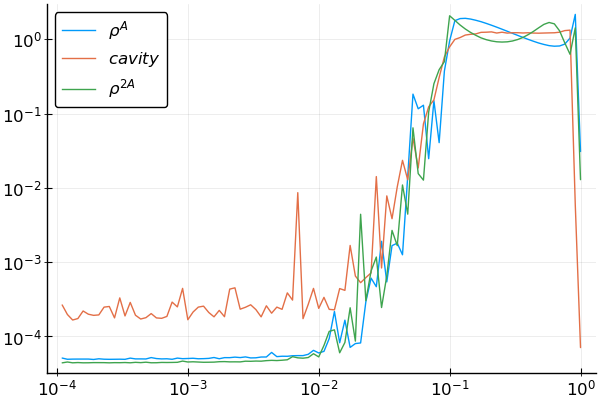

In [51]:
plot(-lambda_barrat[2:end], rho_infty2[2:end], label = L"\rho^A", xscale = :log10, yscale = :log10)
plot!(-lambda_barrat[2:end], rho_ba2[2:end], label = L"cavity")
plot!(-lambda_barrat[2:end], rho_2nd2[2:end], label = L"\rho^{2A}")

In [52]:
Np = 2500
nsteps = 25000
epsilon = 1.e-300
epsilon2 = 1.e-5
ensemble = Int64(10^5);
c = 5;
T = 1.;

In [53]:
rho_infty3 = [rho_barrat_tinfty(lambda, c, T,  ensemble, epsilon2) for lambda in lambda_barrat];

In [54]:
rho_ba3 = [rho_barrat_population(i, c, T, Np, ensemble, nsteps, epsilon, epsilon2) for i in lambda_barrat];

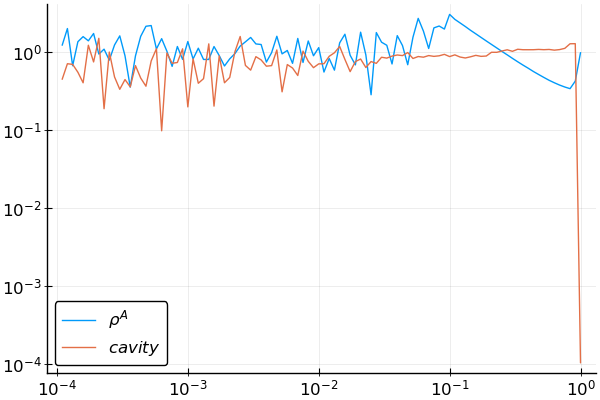

In [55]:
plot(-lambda_barrat[2:end], rho_infty3[2:end], label = L"\rho^A", xscale = :log10, yscale = :log10)
plot!(-lambda_barrat[2:end], rho_ba3[2:end], label = L"cavity")